### Aprenentatge Automàtic i Mineria de Dades (AAMD)
##### GEI (2024-25)
# Pràctica 1: Aprenentatge supervisat

# 1. LECTURA DE LES DADES
    

In [1]:
import pandas as pd

# Read the CSV files
train_df = pd.read_csv('data/diamonds-train.csv')
test_df = pd.read_csv('data/diamonds-test.csv')

# Display the first few rows of each DataFrame
print("Training Data:")
display(train_df.head())
print("Test Data:")
display(test_df.head())



Training Data:


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


Test Data:


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,Ideal,G,VVS2,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,Very Good,F,SI1,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,Ideal,F,IF,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,Premium,D,SI1,62.3,60.0,5.22,5.18,3.24,1715


# 2. PRE-PROCESSAMENT

### A.B.C Detectar outliers a partir de la distribuciÓ

OUTLIERS EN TEST_DF


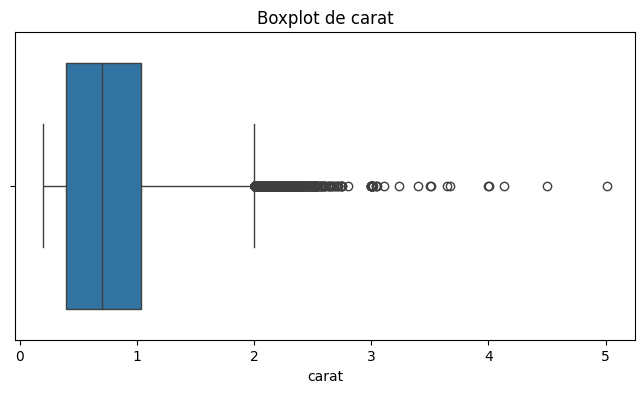

carat - Nombre d'outliers: 1536


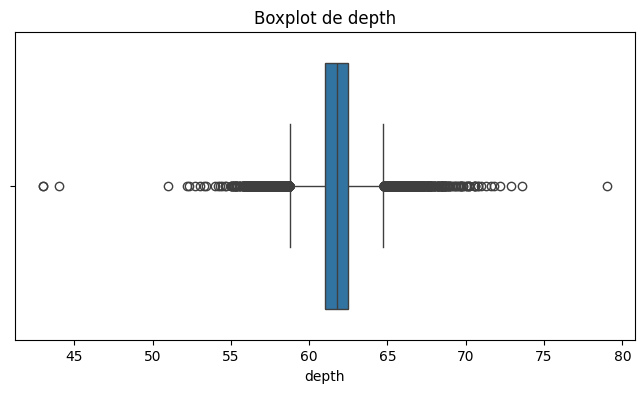

depth - Nombre d'outliers: 2063


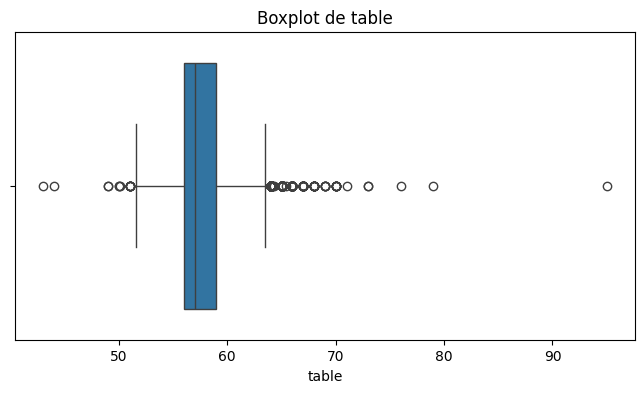

table - Nombre d'outliers: 490


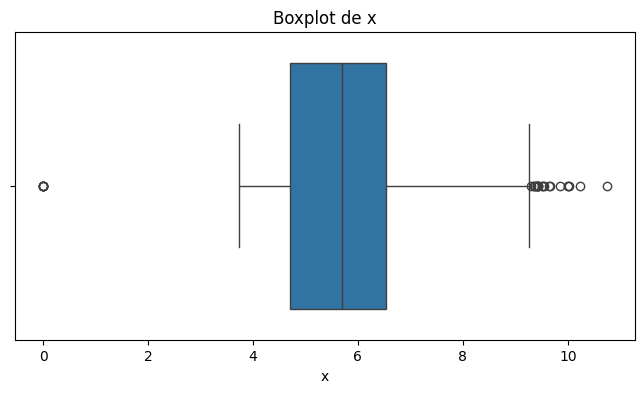

x - Nombre d'outliers: 27


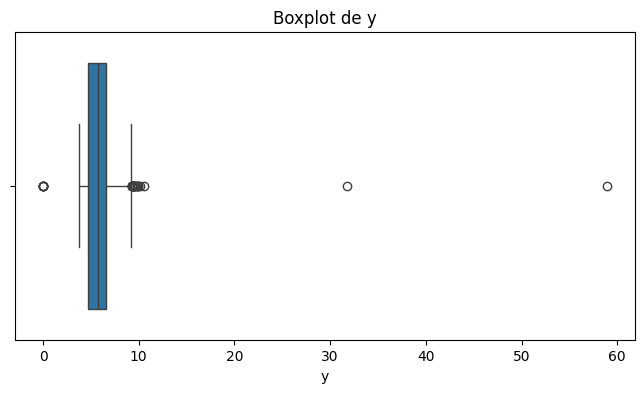

y - Nombre d'outliers: 28


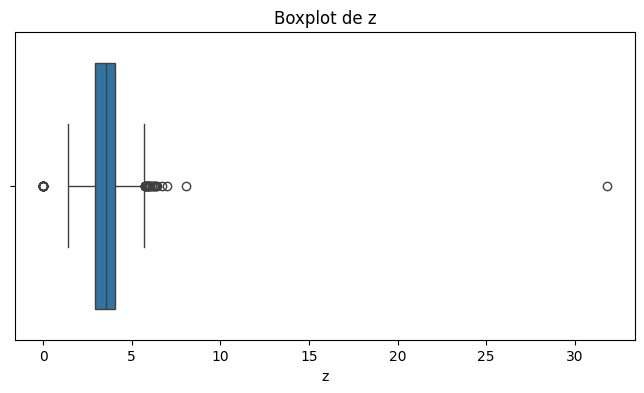

z - Nombre d'outliers: 41


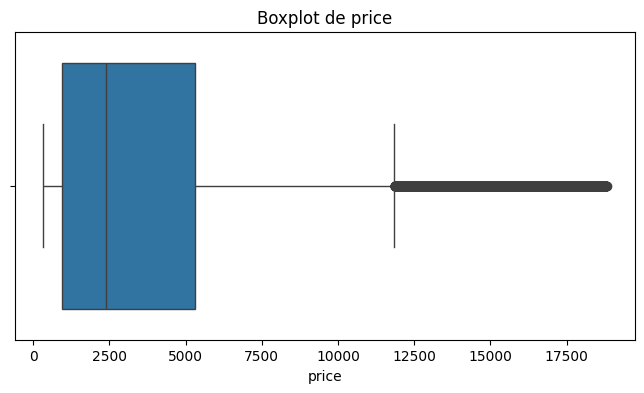

price - Nombre d'outliers: 2907


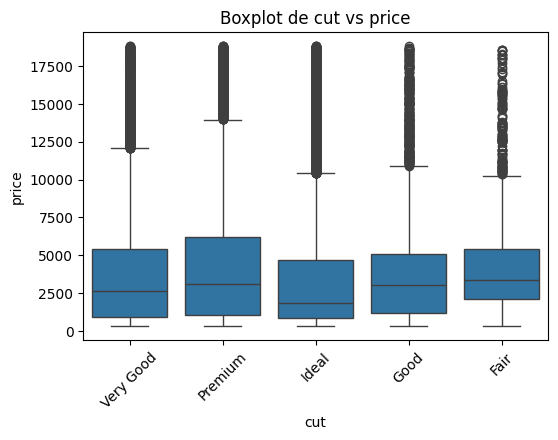

cut - Very Good - Nombre d'outliers: 595
cut - Premium - Nombre d'outliers: 620
cut - Ideal - Nombre d'outliers: 1332
cut - Good - Nombre d'outliers: 259
cut - Fair - Nombre d'outliers: 123


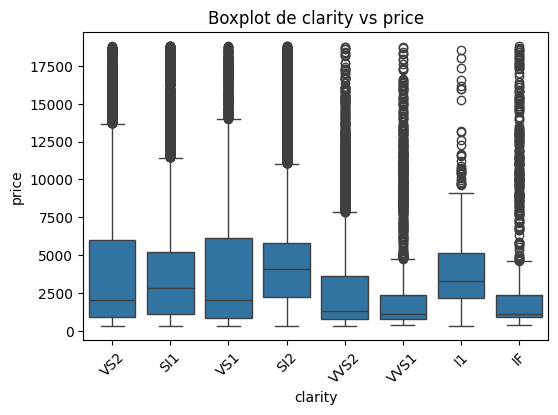

clarity - VS2 - Nombre d'outliers: 454
clarity - SI1 - Nombre d'outliers: 726
clarity - VS1 - Nombre d'outliers: 257
clarity - SI2 - Nombre d'outliers: 891
clarity - VVS2 - Nombre d'outliers: 704
clarity - VVS1 - Nombre d'outliers: 386
clarity - I1 - Nombre d'outliers: 32
clarity - IF - Nombre d'outliers: 228


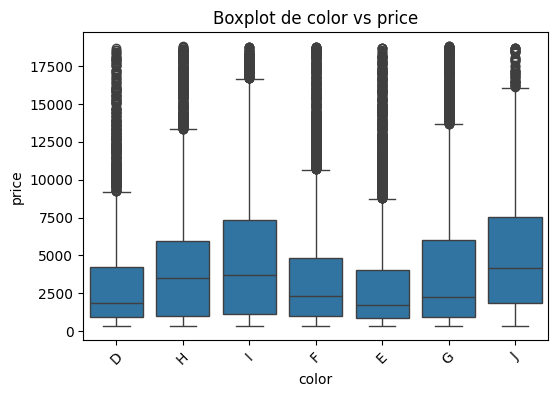

color - D - Nombre d'outliers: 390
color - H - Nombre d'outliers: 377
color - I - Nombre d'outliers: 139
color - F - Nombre d'outliers: 562
color - E - Nombre d'outliers: 636
color - G - Nombre d'outliers: 389
color - J - Nombre d'outliers: 63
OUTLIERS EN TEST_DF


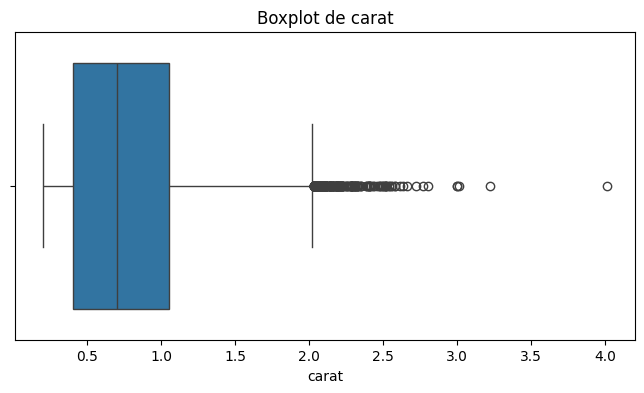

carat - Nombre d'outliers: 245


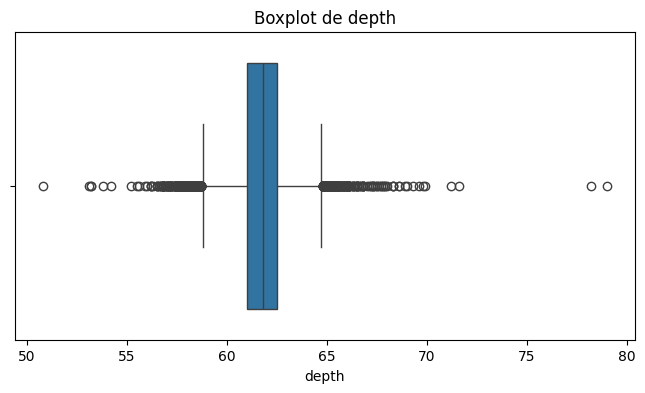

depth - Nombre d'outliers: 482


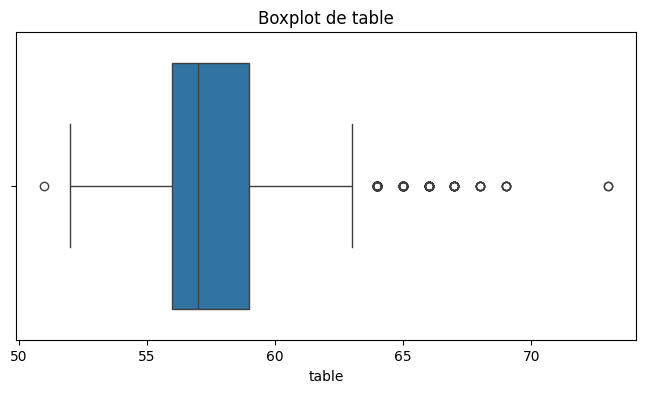

table - Nombre d'outliers: 115


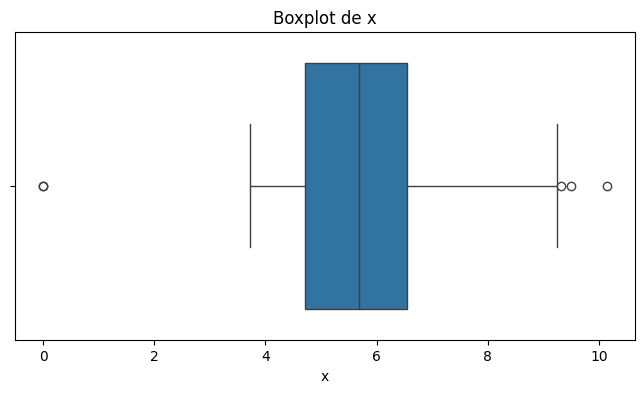

x - Nombre d'outliers: 5


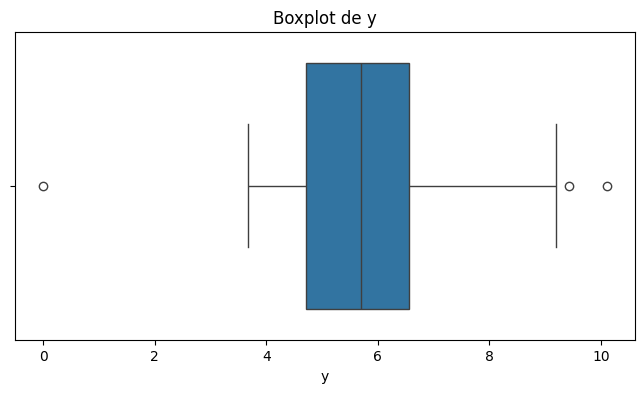

y - Nombre d'outliers: 3


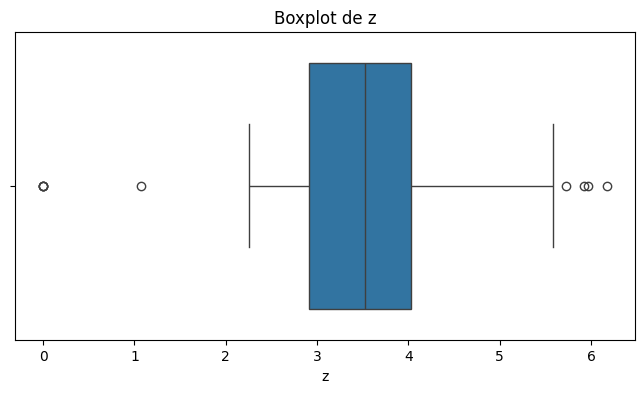

z - Nombre d'outliers: 9


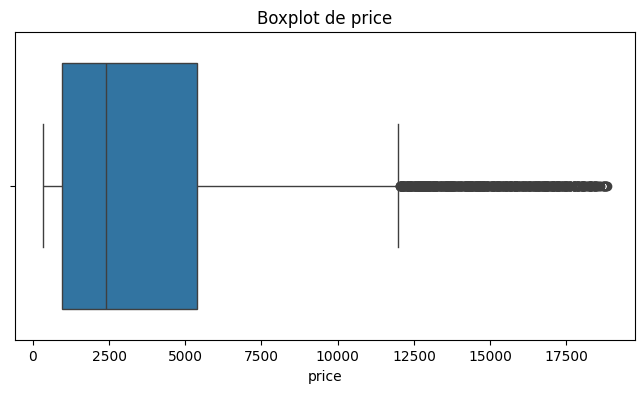

price - Nombre d'outliers: 640


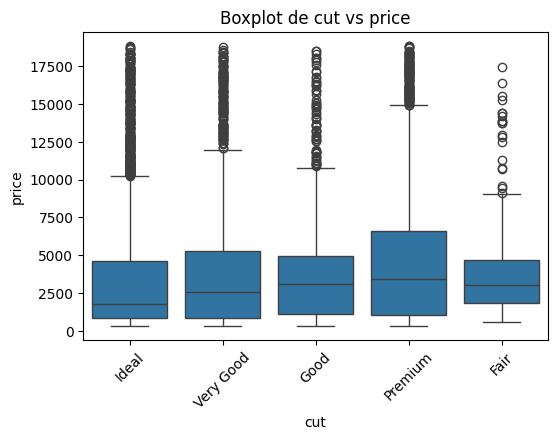

cut - Ideal - Nombre d'outliers: 294
cut - Very Good - Nombre d'outliers: 135
cut - Good - Nombre d'outliers: 65
cut - Premium - Nombre d'outliers: 124
cut - Fair - Nombre d'outliers: 20


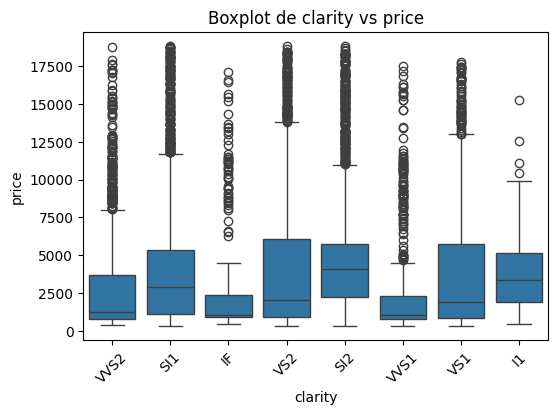

clarity - VVS2 - Nombre d'outliers: 158
clarity - SI1 - Nombre d'outliers: 158
clarity - IF - Nombre d'outliers: 50
clarity - VS2 - Nombre d'outliers: 108
clarity - SI2 - Nombre d'outliers: 197
clarity - VVS1 - Nombre d'outliers: 100
clarity - VS1 - Nombre d'outliers: 66
clarity - I1 - Nombre d'outliers: 4


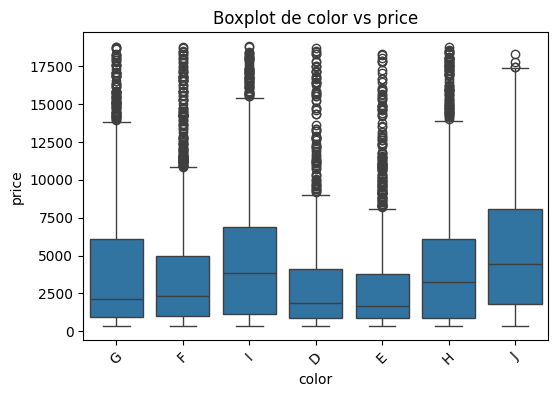

color - G - Nombre d'outliers: 84
color - F - Nombre d'outliers: 129
color - I - Nombre d'outliers: 61
color - D - Nombre d'outliers: 87
color - E - Nombre d'outliers: 134
color - H - Nombre d'outliers: 85
color - J - Nombre d'outliers: 4


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def analitzar_outliers_i_distribucions(df, atributs_numerics=None, atributs_categorics=None):
    if atributs_numerics is None:
        atributs_numerics = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
    if atributs_categorics is None:
        atributs_categorics = ['cut', 'clarity', 'color']

    def detectar_outliers_iqr(dataframe, columna):
        Q1 = dataframe[columna].quantile(0.25)
        Q3 = dataframe[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = dataframe[(dataframe[columna] < Q1 - 1.5 * IQR) | (dataframe[columna] > Q3 + 1.5 * IQR)]
        return outliers

    # Gràfics i detecció d'outliers per atributs numèrics
    for atribut in atributs_numerics:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=atribut)
        plt.title(f'Boxplot de {atribut}')
        plt.show()

        outliers = detectar_outliers_iqr(df, atribut)
        print(f'{atribut} - Nombre d\'outliers: {len(outliers)}')

    # Detecció d'outliers per atributs categòrics basat en el preu
    for col in atributs_categorics:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col, y='price')
        plt.title(f'Boxplot de {col} vs price')
        plt.xticks(rotation=45)
        plt.show()

        for categoria in df[col].unique():
            outliers = detectar_outliers_iqr(df[df[col] == categoria], 'price')
            print(f'{col} - {categoria} - Nombre d\'outliers: {len(outliers)}')

# Exemple d'ús
print("OUTLIERS EN TEST_DF")
analitzar_outliers_i_distribucions(train_df)
print("OUTLIERS EN TEST_DF")
analitzar_outliers_i_distribucions(test_df)


### D. Posar en un taula els outliers


In [5]:
import pandas as pd

def obtenir_outliers_iqr(df, atributs_numerics=None):
    if atributs_numerics is None:
        atributs_numerics = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
    
    def detectar_outliers_iqr(df, columna):
        # Utilitzar IQR per detectar outliers
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        return df[(df[columna] < Q1 - 1.5 * IQR) | (df[columna] > Q3 + 1.5 * IQR)]

    outliers_df = pd.DataFrame()

    for atribut in atributs_numerics:
        outliers = detectar_outliers_iqr(df, atribut)

        if not outliers.empty:
            outliers = outliers.copy()
            outliers['atribut_outlier'] = atribut
            outliers['id'] = outliers.index

            outliers_df = pd.concat([outliers_df, outliers[['id', atribut, 'atribut_outlier']]])

    outliers_df.reset_index(drop=True, inplace=True)
    return outliers_df

outliers_df = obtenir_outliers_iqr(train_df)
outliers_test_df = obtenir_outliers_iqr(test_df)

### Identificar outliers a partir de scatter plots atributs/preu


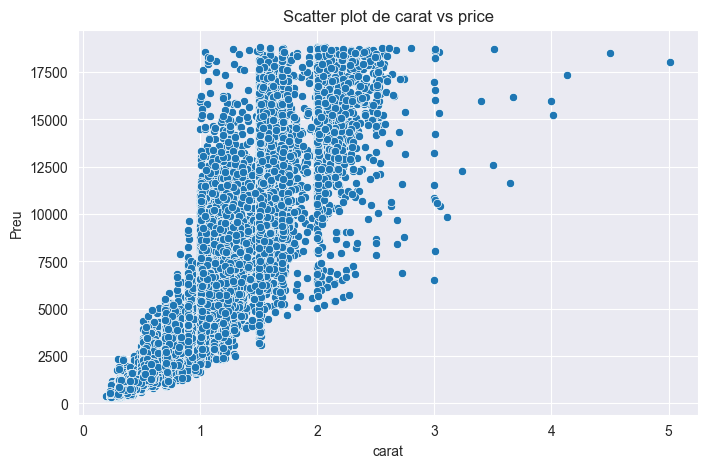

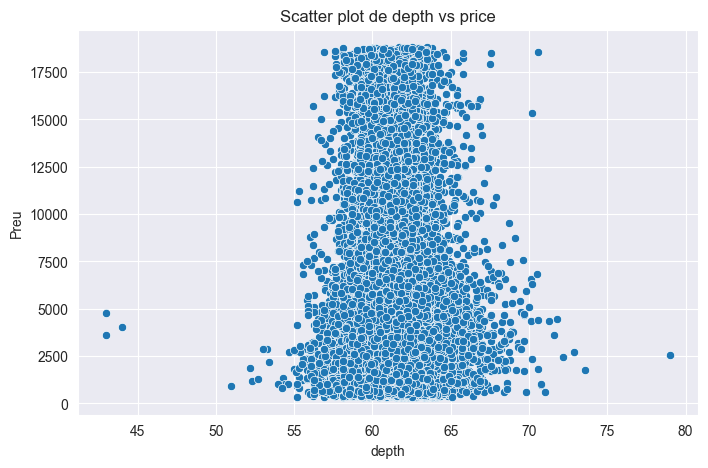

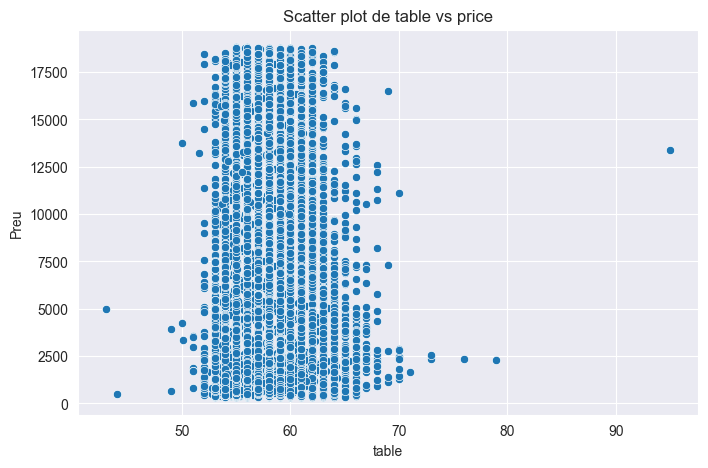

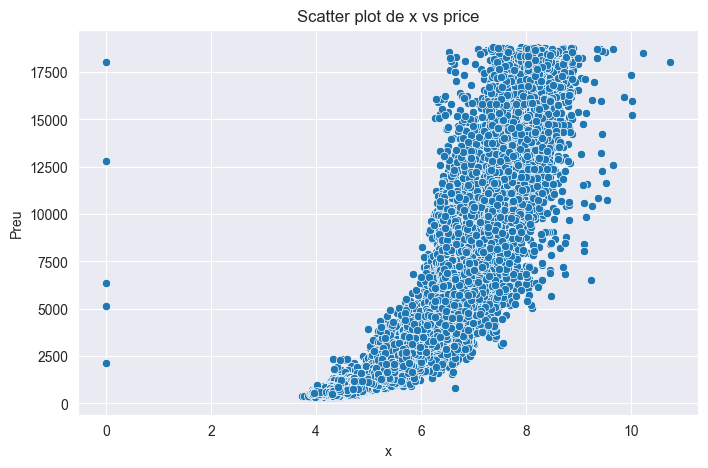

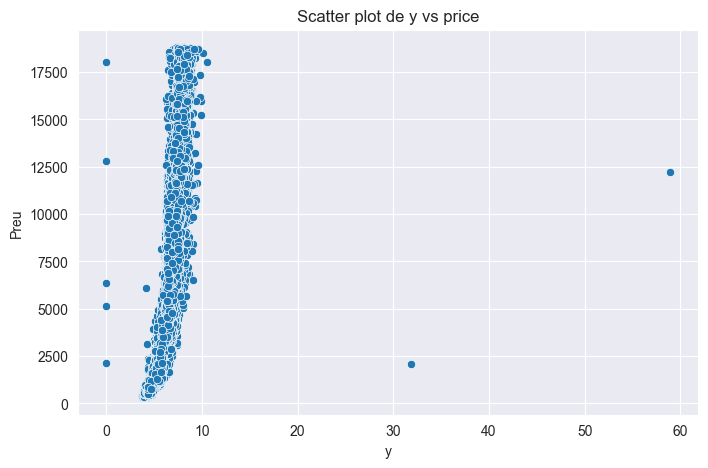

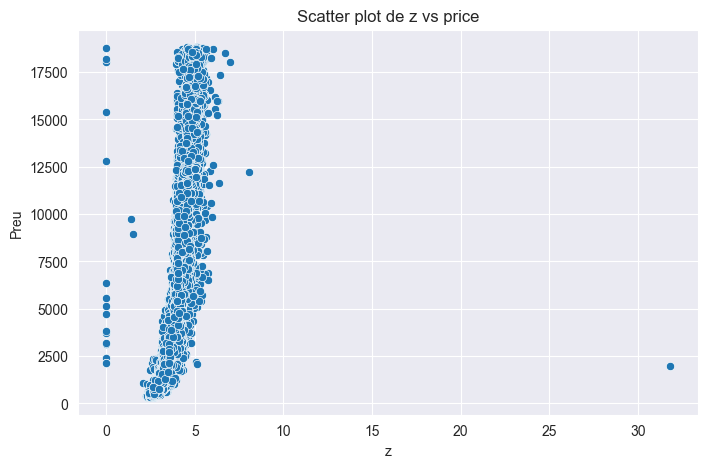

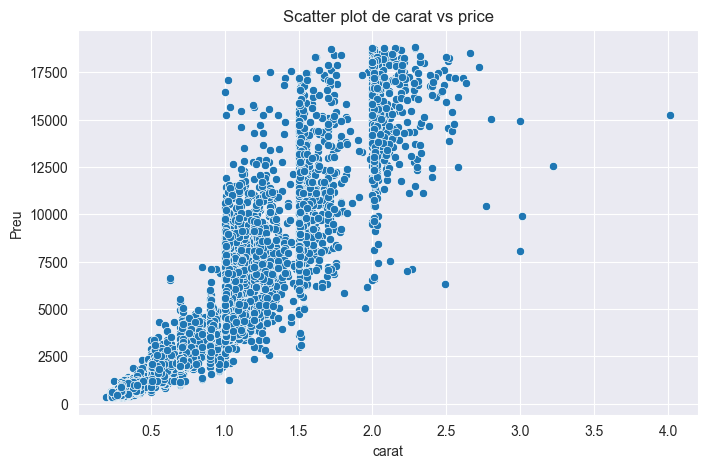

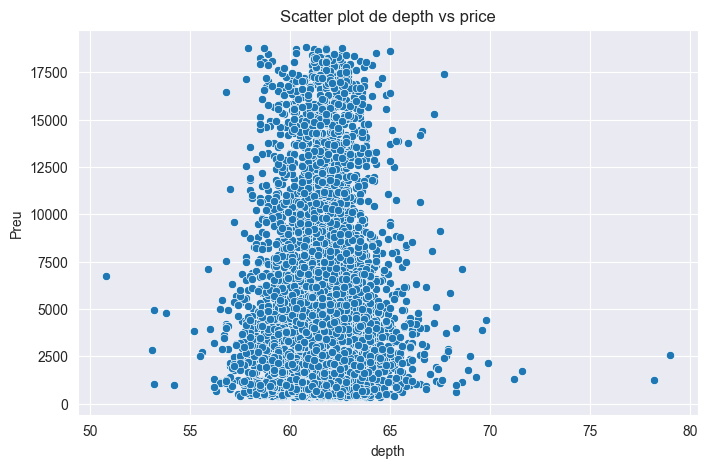

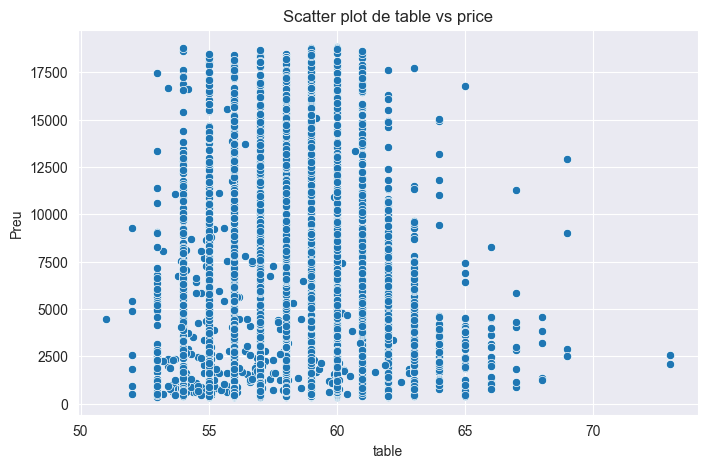

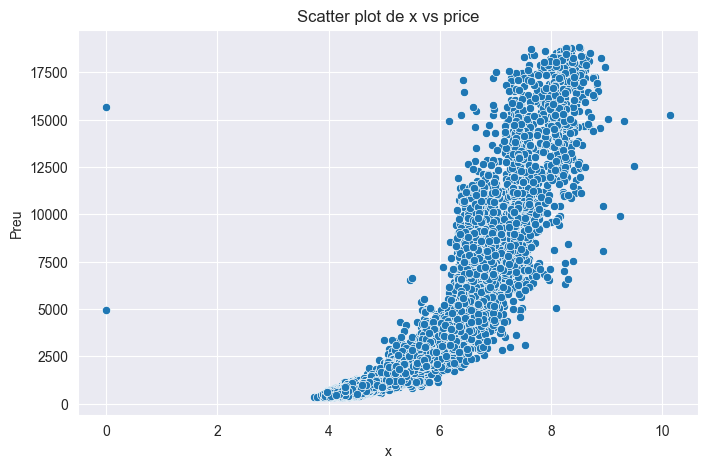

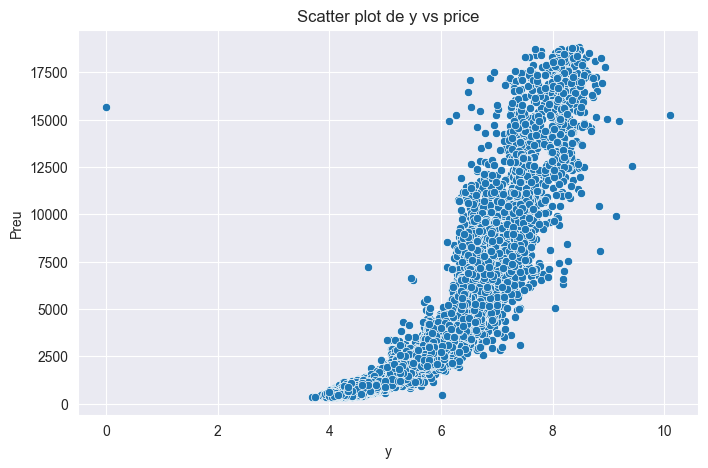

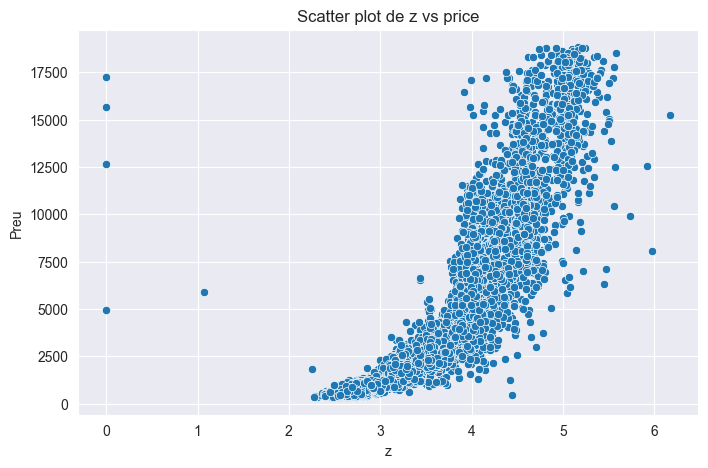

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atributs numèrics que volem comparar amb el preu
atributs = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Dibuixar scatter plots atribut vs preu
for atribut in atributs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=train_df, x=atribut, y='price')
    plt.title(f'Scatter plot de {atribut} vs price')
    plt.xlabel(atribut)
    plt.ylabel('Preu')
    plt.grid(True)
    plt.show()



# Dibuixar scatter plots atribut vs preu
for atribut in atributs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=test_df, x=atribut, y='price')
    plt.title(f'Scatter plot de {atribut} vs price')
    plt.xlabel(atribut)
    plt.ylabel('Preu')
    plt.grid(True)
    plt.show()


### Taula amb els outliers de preu 


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def detectar_anomalies_regressio(df, atributs_numerics=None):
    if atributs_numerics is None:
        atributs_numerics = ['carat', 'depth', 'table', 'x', 'y', 'z']
    
    df = df.copy()
    df['id'] = df.index  # Assegurem que existeix una columna id
    anomalies = []

    for atribut in atributs_numerics:
        X = df[[atribut]]
        y = df['price']
        model = LinearRegression().fit(X, y)
        preds = model.predict(X)

        residus = y - preds
        Q1 = np.percentile(residus, 25)
        Q3 = np.percentile(residus, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        is_outlier = (residus < lower_bound) | (residus > upper_bound)

        for idx in df[is_outlier].index:
            anomalies.append((idx, atribut))

    anom_df = pd.DataFrame(anomalies, columns=['id', 'atribut_anomal'])
    result = df.merge(anom_df, on='id', how='inner')

    cols = ['id'] + atributs_numerics + ['price', 'atribut_anomal']
    result = result[cols]

    return result

anomalies_train = detectar_anomalies_regressio(train_df)
anomalies_test = detectar_anomalies_regressio(test_df)

print("Train - files amb anomalies:", len(anomalies_train['id'].unique()))
print("Test  - files amb anomalies:", len(anomalies_test['id'].unique()))

display(anomalies_train.head())
display(anomalies_test.head())



Train - files amb anomalies: 4659
Test  - files amb anomalies: 1020


,id,carat,depth,table,x,y,z,price,atribut_anomal
0,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,carat
1,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,depth
2,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,table
3,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,x
4,9,1.8,61.4,54.0,7.86,7.82,4.81,16340,y


,id,carat,depth,table,x,y,z,price,atribut_anomal
0,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,carat
1,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,depth
2,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,table
3,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,x
4,2,2.01,58.8,60.0,8.27,8.19,4.84,16731,y


### E. Descriminar outliers
Deixarem de banda tots les files que estiguin presents +1 d'un cop en qualsevol dels dos dataframes d'outliers però deixarem els outliers que estiguin en un patró de continuitat.

In [7]:
def ids_repetits(result_df, outliers_df):
    # Check if 'atribut_anomal' column exists in both DataFrames
    if 'atribut_anomal' in result_df.columns:
        result_df = result_df[~result_df['atribut_anomal'].isin(['table', 'y', 'x', 'z'])]
    if 'atribut_anomal' in outliers_df.columns:
        outliers_df = outliers_df[~outliers_df['atribut_anomal'].isin(['table', 'y', 'x', 'z'])]

    # Combine the 'id' columns from both DataFrames
    combined_ids = pd.concat([result_df['id'], outliers_df['id']])

    # Count the frequency of each ID
    id_counts = combined_ids.value_counts()

    # Filter those that appear more than once
    ids_more_than_once = id_counts[id_counts > 1]

    return ids_more_than_once

ids_more_than_once_train = ids_repetits(anomalies_train, outliers_df)
ids_more_than_once_test = ids_repetits(anomalies_test, outliers_test_df)


In [8]:
def filtrar_ids_repetits(df, ids_repetits):
    """
    Elimina del DataFrame totes les files amb IDs presents a `ids_repetits`.

    Args:
        df (pd.DataFrame): El DataFrame original (ha de tenir una columna 'id').
        ids_repetits (pd.Series or list or Index): Els IDs que s'han de filtrar (com els retornats per value_counts()).

    Returns:
        pd.DataFrame: El DataFrame filtrat sense els IDs indicats.
    """
    df_filtrat = df[~df['id'].isin(ids_repetits.index if isinstance(ids_repetits, pd.Series) else ids_repetits)]
    return df_filtrat
train_without_outliers_df = filtrar_ids_repetits(train_df, ids_more_than_once_train)
test_without_outliers_df = filtrar_ids_repetits(test_df, ids_more_than_once_test)
display(train_without_outliers_df)
display(test_without_outliers_df)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167
...,...,...,...,...,...,...,...,...,...,...,...
43994,43995,0.33,Premium,I,VVS2,61.0,59.0,4.44,4.41,2.70,743
43995,43996,0.91,Very Good,G,VS1,60.9,54.0,6.27,6.38,3.85,4590
43996,43997,0.31,Premium,D,VS1,59.6,58.0,4.41,4.38,2.62,877
43998,43999,1.51,Premium,F,VS2,62.0,62.0,7.35,7.23,4.52,13771


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,Ideal,G,VVS2,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,Very Good,F,SI1,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,Ideal,F,IF,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,Premium,D,SI1,62.3,60.0,5.22,5.18,3.24,1715
...,...,...,...,...,...,...,...,...,...,...,...
9935,53936,2.63,Ideal,J,SI2,62.1,57.0,8.83,8.88,5.50,16914
9936,53937,1.10,Ideal,F,VVS2,61.2,56.0,6.68,6.65,4.08,9817
9937,53938,2.25,Ideal,I,SI2,60.7,56.0,8.54,8.50,5.17,11104
9938,53939,1.02,Very Good,E,IF,63.5,58.0,6.43,6.33,4.05,10710


### F. Numeritzar les categories qualitatives
Utilitzarem un ordre de pitjor a dolent amb un mapeig


In [9]:
import pandas as pd

def convertir_categories_a_numerics(df):
    """
    Converteix les columnes categòriques 'cut', 'color' i 'clarity' a valors numèrics segons un mapping predefinit.

    Args:
        df (pd.DataFrame): DataFrame amb les columnes categòriques a convertir.

    Returns:
        pd.DataFrame: Nou DataFrame amb les categories convertides a valors numèrics.
    """
    without_outliers_no_categories_df = df.copy()

    cut_mapping = {
        'Fair': 0,
        'Good': 1,
        'Very Good': 2,
        'Premium': 3,
        'Ideal': 4
    }

    color_mapping = {
        'D': 0, 'E': 1, 'F': 2,
        'G': 3, 'H': 4, 'I': 5, 'J': 6
    }

    clarity_mapping = {
        'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4,
        'VVS2': 5, 'VVS1': 6, 'IF': 7
    }

    without_outliers_no_categories_df['cut'] = without_outliers_no_categories_df['cut'].replace(cut_mapping)
    without_outliers_no_categories_df['color'] = without_outliers_no_categories_df['color'].replace(color_mapping)
    without_outliers_no_categories_df['clarity'] = without_outliers_no_categories_df['clarity'].replace(clarity_mapping)

    return without_outliers_no_categories_df

train_without_outliers_no_categories_df = convertir_categories_a_numerics(train_without_outliers_df)
test_without_outliers_no_categories_df = convertir_categories_a_numerics(test_without_outliers_df)
display(train_without_outliers_no_categories_df.head())
display(test_without_outliers_no_categories_df.head())


C:\Users\pc\AppData\Local\Temp\ipykernel_23236\1515768290.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  without_outliers_no_categories_df['cut'] = without_outliers_no_categories_df['cut'].replace(cut_mapping)
C:\Users\pc\AppData\Local\Temp\ipykernel_23236\1515768290.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  without_outliers_no_categories_df['color'] = without_outliers_no_categories_df['color'].replace(color_mapping)
C:\Users\pc\AppData\Local\Temp\ipykernel_23236\1515768290.py:35: FutureWarning: Downcasting behavi

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,2,0,3,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,3,4,3,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,4,5,2,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,1,4,3,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,4,5,4,62.1,54.0,5.77,5.80,3.59,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,4,3,5,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,2,2,2,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,1,5,2,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,4,2,7,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,3,0,2,62.3,60.0,5.22,5.18,3.24,1715


### G. Estandaritzar carat, depth, table


In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def estandarditzar_columnes(df, columnes_a_estandaritzar=None):
    """
    Estandarditza les columnes especificades d’un DataFrame utilitzant StandardScaler.

    Args:
        df (pd.DataFrame): El DataFrame d'entrada.
        columnes_a_estandaritzar (list, opcional): Llista de columnes a estandarditzar. Per defecte: ['carat', 'depth', 'table'].

    Returns:
        pd.DataFrame: Un nou DataFrame amb les columnes especificades estandarditzades.
    """
    if columnes_a_estandaritzar is None:
        columnes_a_estandaritzar = ['carat', 'depth', 'table']
    
    df_estandarditzat = df.copy()
    scaler = StandardScaler()
    df_estandarditzat[columnes_a_estandaritzar] = scaler.fit_transform(df_estandarditzat[columnes_a_estandaritzar])

    return df_estandarditzat

train_without_outliers_no_categories_estandaritzar_df = estandarditzar_columnes(train_without_outliers_no_categories_df)
test_without_outliers_no_categories_estandaritzar_df = estandarditzar_columnes(test_without_outliers_no_categories_df)
# Ver el DataFrame estandarizado
display(train_without_outliers_no_categories_estandaritzar_df.head())
display(test_without_outliers_no_categories_estandaritzar_df.head())


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,-0.565221,2,0,3,1.014456,-0.649220,5.10,5.15,3.24,1601
1,2,-1.009041,3,4,3,0.454312,0.247172,4.36,4.33,2.71,648
2,3,-0.079132,4,5,2,0.034204,-0.201024,5.89,5.83,3.62,2399
3,4,0.449226,1,4,3,-0.665977,1.591761,6.43,6.50,3.93,5229
4,5,-0.142535,4,5,4,0.244258,-1.545613,5.77,5.80,3.59,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,0.613826,4,3,5,0.525502,-0.664813,6.54,6.58,4.10,8282
1,44002,-0.206341,2,2,2,-1.347338,1.118980,5.75,5.83,3.46,2196
2,44003,2.548580,1,5,2,-2.040982,1.118980,8.27,8.19,4.84,16731
3,44004,-1.110628,4,2,7,0.039951,-1.110761,4.14,4.21,2.57,760
4,44005,-0.542820,3,0,2,0.386773,1.118980,5.22,5.18,3.24,1715


### G. Estandaritzar x, y, z
Entre -1 i 1 i de forma conjunta

In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def normalitzar_xyz_minmax(df, columnes_a_normalitzar=None, rang=(-1, 1)):
    """
    Aplica MinMaxScaler a les columnes 'x', 'y', 'z' dins d’un rang donat (per defecte [-1, 1]).

    Args:
        df (pd.DataFrame): DataFrame d’entrada amb les columnes a normalitzar.
        columnes_a_normalitzar (list, optional): Columnes a normalitzar. Per defecte: ['x', 'y', 'z'].
        rang (tuple, optional): Rang pel MinMaxScaler. Per defecte: (-1, 1).

    Returns:
        pd.DataFrame: Nou DataFrame amb les columnes normalitzades.
    """
    if columnes_a_normalitzar is None:
        columnes_a_normalitzar = ['x', 'y', 'z']
    
    df_normalitzat = df.copy()
    scaler = MinMaxScaler(feature_range=rang)
    df_normalitzat[columnes_a_normalitzar] = scaler.fit_transform(df_normalitzat[columnes_a_normalitzar])
    
    return df_normalitzat

train_without_outliers_no_categories_estandaritzar_xyz_df = normalitzar_xyz_minmax(train_without_outliers_no_categories_df)
test_without_outliers_no_categories_estandaritzar_xyz_df = normalitzar_xyz_minmax(test_without_outliers_no_categories_df)
display(test_without_outliers_no_categories_estandaritzar_xyz_df.head())
display(train_without_outliers_no_categories_estandaritzar_xyz_df.head())



,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282
1,44002,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196
2,44003,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731
3,44004,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760
4,44005,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601
1,2,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648
2,3,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399
3,4,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229
4,5,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167


### G. Estandaritzar preus

Crear log_price, logaritme de l'atribut price

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def afegir_log_price_escalat(df, columna_preu='price', nou_nom='log_price', rang=(0.1, 0.9)):
    """
    Afegeix una columna logarítmica del preu i l’escalada dins d’un rang especificat.

    Args:
        df (pd.DataFrame): DataFrame original amb la columna de preus.
        columna_preu (str): Nom de la columna amb el preu original. Per defecte: 'price'.
        nou_nom (str): Nom de la nova columna. Per defecte: 'log_price'.
        rang (tuple): Rang per al MinMaxScaler. Per defecte: (0.1, 0.9).

    Returns:
        pd.DataFrame: Nou DataFrame amb la columna 'log_price' normalitzada.
    """
    df_log_escalat = df.copy()
    df_log_escalat[nou_nom] = np.log(df_log_escalat[columna_preu])
    
    scaler = MinMaxScaler(feature_range=rang)
    df_log_escalat[nou_nom] = scaler.fit_transform(df_log_escalat[[nou_nom]])

    return df_log_escalat
df_log_escalat_train = afegir_log_price_escalat(train_without_outliers_no_categories_estandaritzar_xyz_df)
df_log_escalat_test = afegir_log_price_escalat(test_without_outliers_no_categories_estandaritzar_xyz_df)
display(df_log_escalat_test.head())
display(df_log_escalat_train.head())


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,44001,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282,0.737092
1,44002,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196,0.473689
2,44003,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731,0.876622
3,44004,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760,0.263143
4,44005,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715,0.424633


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
0,1,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601,0.413928
1,2,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648,0.235513
2,3,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399,0.493702
3,4,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229,0.647397
4,5,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167,0.473640


### J. Crear atribut high_price

In [13]:
import numpy as np
import pandas as pd

def afegir_columna_high_price(df, columna_preu='price', nou_nom='high_price', llindar=2500):
    """
    Afegeix una columna binària 'high_price' basada en si el preu supera un llindar.

    Args:
        df (pd.DataFrame): DataFrame original amb la columna de preu.
        columna_preu (str): Nom de la columna amb el preu. Per defecte: 'price'.
        nou_nom (str): Nom de la nova columna. Per defecte: 'high_price'.
        llindar (int or float): Valor a partir del qual es considera preu alt. Per defecte: 2500.

    Returns:
        pd.DataFrame: Nou DataFrame amb la columna binària afegida.
    """
    df_high_price = df.copy()
    df_high_price[nou_nom] = np.where(df_high_price[columna_preu] >= llindar, 1, 0)
    return df_high_price
df_high_price_train = afegir_columna_high_price(df_log_escalat_train)
df_high_price_test = afegir_columna_high_price(df_log_escalat_test)
display(df_high_price_test.head())
display(df_high_price_train.head())


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,44001,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282,0.737092,1
1,44002,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196,0.473689,0
2,44003,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731,0.876622,1
3,44004,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760,0.263143,0
4,44005,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715,0.424633,0


,id,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,1,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601,0.413928,0
1,2,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648,0.235513,0
2,3,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399,0.493702,0
3,4,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229,0.647397,1
4,5,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167,0.473640,0


### OBSERVACIÓ: Drop categoria ID
No ens és rellevant.

In [14]:
# Eliminar la columna 'id' (o la columna de categoria que s'anomeni de forma similar)
test_processed_df = df_high_price_test.drop(columns=['id'])
train_processed_df = df_high_price_train.drop(columns=['id'])

# Visualitzar el DataFrame per verificar que la columna ha estat eliminada
display(test_processed_df)
display(train_processed_df.head())


,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,1.09,4,3,5,62.5,56.0,0.289941,0.302970,0.329011,8282,0.737092,1
1,0.70,2,2,2,59.8,60.0,0.134122,0.154455,0.121556,2196,0.473689,0
2,2.01,1,5,2,58.8,60.0,0.631164,0.621782,0.568882,16731,0.876622,1
3,0.27,4,2,7,61.8,55.0,-0.183432,-0.166337,-0.166937,760,0.263143,0
4,0.54,3,0,2,62.3,60.0,0.029586,0.025743,0.050243,1715,0.424633,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,2.63,4,6,1,62.1,57.0,0.741617,0.758416,0.782820,16914,0.878781,1
9936,1.10,4,2,5,61.2,56.0,0.317554,0.316832,0.322528,9817,0.770831,1
9937,2.25,4,5,1,60.7,56.0,0.684418,0.683168,0.675851,11104,0.795275,1
9938,1.02,2,1,7,63.5,58.0,0.268245,0.253465,0.312804,10710,0.788106,1


,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
0,0.53,2,0,3,63.2,56.0,-0.050279,-0.825127,-0.796226,1601,0.413928,0
1,0.32,3,4,3,62.4,58.0,-0.188082,-0.852971,-0.829560,648,0.235513,0
2,0.76,4,5,2,61.8,57.0,0.096834,-0.802037,-0.772327,2399,0.493702,0
3,1.01,1,4,3,60.8,61.0,0.197393,-0.779287,-0.752830,5229,0.647397,1
4,0.73,4,5,4,62.1,54.0,0.074488,-0.803056,-0.774214,2167,0.473640,0


# 3. PREDICCIÓ DEL PREU
### A.B.C Entrenament amb diferents parametres

Utilizarem cross-validation per a ajustar els parametres del model. La mesura de qualitat (MAPE) es troba al output.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("Loading data...")

# Define features and target variable
X = train_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = train_processed_df['log_price']

print("Splitting data into training and testing sets...", flush=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Defining models and hyperparameters...", flush=True)

# Define the models and their hyperparameters for cross-validation
models = {
    'MLR': LinearRegression(),
    'k-NN': KNeighborsRegressor(),
    'MLNN-BP': MLPRegressor(max_iter=1000)
}

param_grids = {
    'MLR': {
        'model__fit_intercept': [True, False],
        'model__n_jobs': [None, -1, 1, 2],
    },
    'k-NN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    'MLNN-BP': {
        'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
    }
}

print("Performing cross-validation and hyperparameter tuning...", flush=True)

# Perform cross-validation and hyperparameter tuning
best_estimators = {}
for model_name in models:
    print(f"Processing model: {model_name}", flush=True)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[model_name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Completed model: {model_name}", flush=True)

print("Evaluating models on the test set...", flush=True)

# Evaluate the models on the test set
results = {}
for model_name in best_estimators:
    model = best_estimators[model_name]
    score = model.score(X_test, y_test)
    results[model_name] = score
    print(f"Evaluation completed for model: {model_name}", flush=True)

print("Model evaluation results:", flush=True)
for model_name in results:
    print(f"{model_name}: {results[model_name]}", flush=True)

print("Best parameters for each model:", flush=True)
for model_name in best_estimators:
    print(f"{model_name}: {best_estimators[model_name].get_params()}")
    
with open('best_parameters2.txt', 'w') as f:
    for model_name in best_estimators:
        f.write(f"{model_name}: {best_estimators[model_name].get_params()}\n")


Loading data...
Splitting data into training and testing sets...
Defining models and hyperparameters...
Performing cross-validation and hyperparameter tuning...
Processing model: MLR
Completed model: MLR
Processing model: k-NN
Completed model: k-NN
Processing model: MLNN-BP
Completed model: MLNN-BP
Evaluating models on the test set...
Evaluation completed for model: MLR
Evaluation completed for model: k-NN
Evaluation completed for model: MLNN-BP
Model evaluation results:
MLR: 0.8079390110657573
k-NN: 0.9819506056797974
MLNN-BP: 0.9802831646782958
Best parameters for each model:
MLR: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LinearRegression())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}
k-NN: {'memory': None, 'steps': [('scaler', 

##  D. TESTING ON DATAFRAME TEST
#### E.F És fa la predicció del preu per a cada model.


MAPE results:
MLR: 43.62999698133723
k-NN: 0.004072250291021576
MLNN-BP: 6.674591981584786


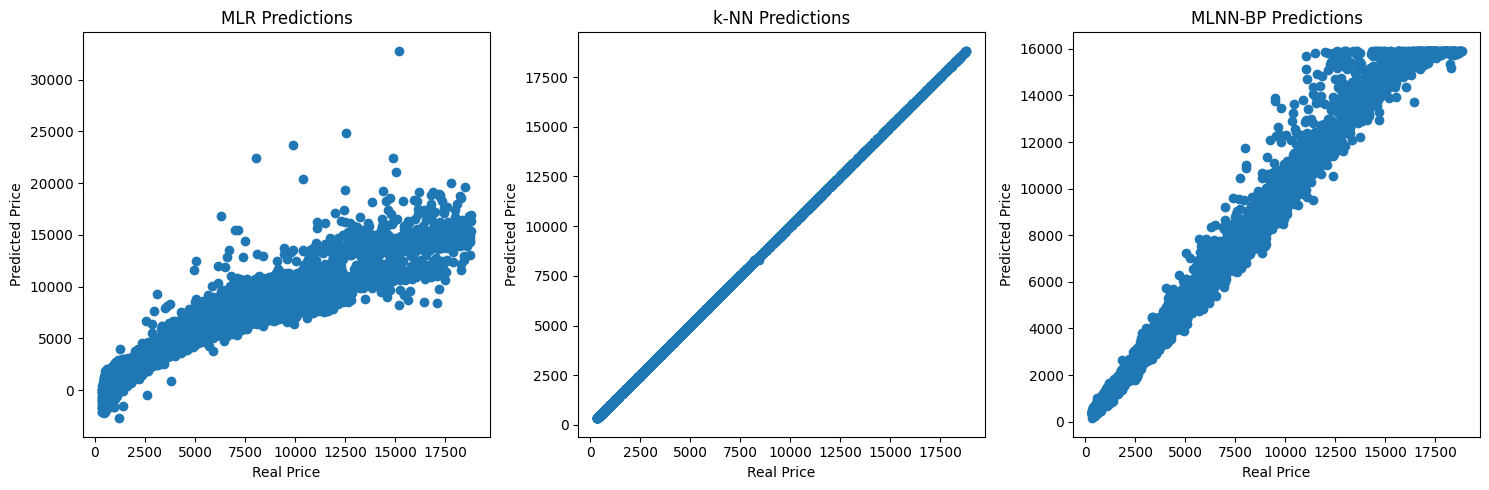

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error


# Define features and target variable for test data
X_test = test_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y_test = test_processed_df['price']

# Define the best models with their best parameters
best_models = {
    'MLR': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression(fit_intercept=True, n_jobs=None))
    ]),
    'k-NN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor(n_neighbors=9, weights='distance'))
    ]),
    'MLNN-BP': Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10000, solver='adam'))
    ])
}

# Fit the models on the test data and make predictions
predictions = {}
for model_name in best_models:
    model = best_models[model_name]
    model.fit(X_test, y_test)  # Fit the model on the test data
    predictions[model_name] = model.predict(X_test)  # Make predictions

# Calculate MAPE for each model using real price instead of log_price
mape_results = {}
for model_name in predictions:
    mape_results[model_name] = mean_absolute_percentage_error(y_test, predictions[model_name]) * 100
# Generate a dataframe with the original attributes and the predictions of the three models
results_df = test_processed_df.copy()
results_df['pred_price_mlr'] = predictions['MLR']
results_df['pred_price_knn'] = predictions['k-NN']
results_df['pred_price_bp'] = predictions['MLNN-BP']

# Print MAPE results
print("MAPE results:")
for model_name in mape_results:
    print(f"{model_name}: {mape_results[model_name]}")

# Scatter plots between the real price and its prediction for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, results_df['pred_price_mlr'])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('MLR Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_test, results_df['pred_price_knn'])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('k-NN Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_test, results_df['pred_price_bp'])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('MLNN-BP Predictions')

plt.tight_layout()
plt.show()


## G. Conclusions
Despres d'executar analitzem separadament cada model:

**MLR**: Ens dona un MAPE bastant elevat, a mesura que augmenta el preu real augmenta, el preu que es predeix augmenta el seu marge d'error, hi ha bastants valors per sota de 15000 als valors més alts amb també preus disparadissims com el de 32000 que s'ha predit. Aixó podria ser degut a que la relació entre el preu i els altres atributs no son lineals i aquesta és una limitació de MLR.

**k-NN**: El MAPE és mínim, els resultats són excelents.  El k-nn és un model molt bo en tasques de regressesió simplement mirant als punts més propers.

**MLNN-BP**: El MAPE és considerable, encara que en xifres baixes és molt precis, poc a poc comença el seu dispersament en xifres de predicció de preus més altes. Potser amb més dades per entrenar podriem haver baixat el MAPE, cal recalcar també que en l'entrenament el seu 'score' era molt similar al k-nn, segurament ha patit overfitting a l'entrenament. Encara aixi són resultats prou bons, fent emfasis en la seva virtut per a modelar relacions no lineals.



### 4. CLASSIFICACIÓ DEL PREU
##### Predicció de **clasificació**, en aquest cas utilizem el LR, SVM I MLNN-BP.


### HIGH PRICE TEST PREDICTION



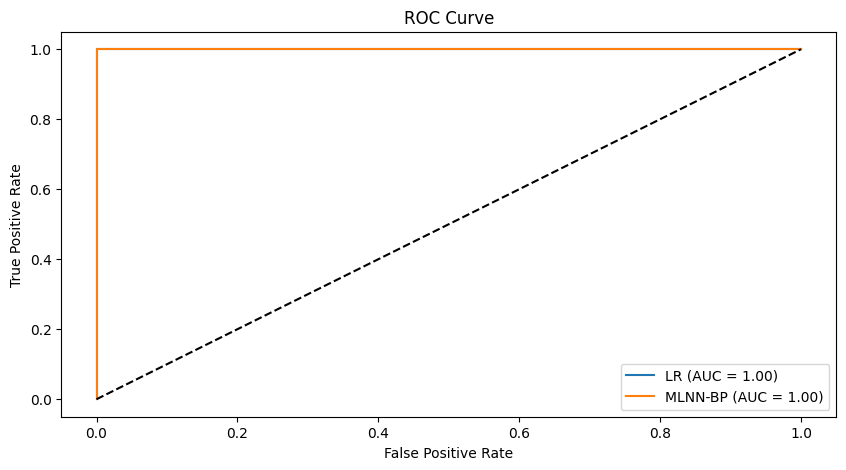

LR - Accuracy: 1.00, Sensitivity: 1.00, Specificity: 1.00
SVM - Accuracy: 1.00, Sensitivity: 1.00, Specificity: 1.00
MLNN-BP - Accuracy: 1.00, Sensitivity: 1.00, Specificity: 1.00


In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming test_processed_df is already loaded
X_test = test_processed_df.drop(columns=['high_price'])
y_test = test_processed_df['high_price']

# Define models with specified parameters
models = {
    'LR': LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear'),
    'SVM': SVC(C=10, degree=2, probability=True),
    'MLNN-BP': MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='adaptive', max_iter=1000)
}

# Standardize the data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Fit models and make predictions
predictions = {}
probabilities = {}
for name, model in models.items():
    model.fit(X_test_scaled, y_test)
    predictions[name] = model.predict(X_test_scaled)
    if name in ['LR', 'MLNN-BP']:
        probabilities[name] = model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, sensitivity, and specificity
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return accuracy, sensitivity, specificity

metrics = {name: calculate_metrics(y_test, pred) for name, pred in predictions.items()}

# Generate dataframe with original attributes and classifications
results_df = test_processed_df.copy()
results_df['class_high_price_lr'] = predictions['LR']
results_df['class_high_price_svm'] = predictions['SVM']
results_df['class_high_price_bp'] = predictions['MLNN-BP']
results_df['prob_high_price_lr'] = probabilities['LR']
results_df['prob_high_price_bp'] = probabilities['MLNN-BP']

# Plot ROC curves and calculate AUC for LR and MLNN-BP
plt.figure(figsize=(10, 5))
for name in ['LR', 'MLNN-BP']:
    fpr, tpr, _ = roc_curve(y_test, probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print metrics
for name, (accuracy, sensitivity, specificity) in metrics.items():
    print(f'{name} - Accuracy: {accuracy:.2f}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}')


## Conclusions
Despres d'executar els 3 models han classificat correctament totes les files.

Totes les mesures d'evaluació de classificació estan a 1. Aixó vol dir que ha detectat tots els casos positius (sensitivity)
també tots els casos negatius (specificity). No hi ha falsos positius i ni falsos negatius.

La curva ROC, ens confirma el que ja em vist amb els evaluadors, tant LR com MLNN-BP son en aquest conjunt de dadesl clasificadors perfectes, l'area sota la curva és maxima.

Podem associar aquest resultats a que la classificació de high-price és bastant simple, ja que la dificultat
només és trobava en els punts fronterers (2500$), tots els altres punts no havia dubte de a quina categoria
pertanyen.

Pel cas de la **regressió logisica**, ha sigut capaç de predir correctament la probabilitat de cada fila de pertanyer a High-price(1) o de no pertanyer(0), la regressió logistica és especiament virtuosa en classificació. Al ser un model estadistic, classifica segons la probabilitat de pertanyer a  Y = 0 o Y =1 amb la curva sigmoide.

Pel cas del **SVM**, les dades han pogut ser separades i per aixó ha pogut fer una evaluació perfecta, els punts rellevants eren només els punts de support, el hyperpla era separable. Durant el entrenament i testing s'ha pogut trobar una bona linia amb els vectors de suport que maximitzava el marge.

Pel cas de **MLNN-BP** podem justificar que les prediccions siguin bones gràcies a que el model ha pogut construir la funció que aproxima correctament les dades, en aquest cas era si 2500 > price then Y = 1 else Y = 0. Durant l'entrament podem constatar que els biaixos i pesos s'ha ajustat correctament, ja que hem reduit l'error quadratic.

Encara que el error quadratic era molt positiu (0.97-0.98), és sorprenent obtenir resultats perfectes.



### ANNEX: Extensive Tuning

Tuning de parametres llarg per poder millorar resultats, el deixem al final perque triga +6 hores.



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("Loading data...")

# Define features and target variable
X = train_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = train_processed_df['log_price']

print("Splitting data into training and testing sets...", flush=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Defining models and hyperparameters...", flush=True)

# Define the models and their hyperparameters for cross-validation
models = {
    'MLR': LinearRegression(),
    'k-NN': KNeighborsRegressor(),
    'MLNN-BP': MLPRegressor(max_iter=1000)
}

param_grids = {
    'MLR': {
        'model__fit_intercept': [True, False],
        'model__n_jobs': [None, -1, 1, 2],
    },
    'k-NN': {
        'model__n_neighbors': [9, 11, 13],  # Expanded range
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree'],  # Added parameter
        'model__leaf_size': [10, 20],  # Added parameter
    },
    'MLNN-BP': {
        'model__hidden_layer_sizes': [ (50, 50), (100, 50), (50, 100)],  # Expanded range
        'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
        'model__learning_rate': ['constant', 'invscaling', 'adaptive'],  # Added parameter
    }
}


print("Performing cross-validation and hyperparameter tuning...", flush=True)

# Perform cross-validation and hyperparameter tuning
best_estimators = {}



for model_name in models:
    
    
    
    print(f"Processing model: {model_name}", flush=True)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[model_name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Completed model: {model_name}", flush=True)
    
    
print("Evaluating models on the test set...", flush=True)

# Evaluate the models on the test set
results = {}
for model_name in best_estimators:
    model = best_estimators[model_name]
    score = model.score(X_test, y_test)
    results[model_name] = score
    print(f"Evaluation completed for model: {model_name}", flush=True)

print("Model evaluation results:", flush=True)
for model_name in results:
    print(f"{model_name}: {results[model_name]}", flush=True)

print("Best parameters for each model:", flush=True)
for model_name in best_estimators:
    print(f"{model_name}: {best_estimators[model_name].get_params()}")
    
with open('best_parameters2.txt', 'w') as f:
    for model_name in best_estimators:
        f.write(f"{model_name}: {best_estimators[model_name].get_params()}\n")


Loading data...
Splitting data into training and testing sets...
Defining models and hyperparameters...
Performing cross-validation and hyperparameter tuning...
Processing model: MLR
Completed model: MLR
Processing model: k-NN
Completed model: k-NN
Processing model: MLNN-BP
Completed model: MLNN-BP
Evaluating models on the test set...
Evaluation completed for model: MLR
Evaluation completed for model: k-NN
Evaluation completed for model: MLNN-BP
Model evaluation results:
MLR: 0.8079390110657573
k-NN: 0.9822011064978439
MLNN-BP: 0.965358410039384
Best parameters for each model:
MLR: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LinearRegression())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__copy_X': True, 'model__fit_intercept': True, 'model__n_jobs': None, 'model__positive': False}
k-NN: {'memory': None, 'steps': [('scaler', S

### Tunning High price

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features and target variable
X = train_processed_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = train_processed_df['high_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models with best parameters
models = {
    'LR': LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear'),
    'SVM': SVC(C=10, degree=2, probability=True),
    'MLNN-BP': MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='adaptive', max_iter=1000)
}

# No hyperparameter tuning needed; fixed parameters are already optimal
param_grids = {
    'LR': {},
    'SVM': {},
    'MLNN-BP': {}
}

# Perform model training
best_estimators = {}
for model_name in models:
    print(f"Processing model: {model_name}", flush=True)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[model_name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Processed model: {model_name}", flush=True)

# Evaluate the models on the test set
results = {}
for model_name in best_estimators:
    model = best_estimators[model_name]
    score = model.score(X_test, y_test)
    results[model_name] = score

print("Model evaluation results:")
for model_name in results:
    print(f"{model_name}: {results[model_name]}")

print("Best parameters for each model:")
for model_name in best_estimators:
    print(f"{model_name}: {best_estimators[model_name].get_params()}")

with open('best_parameters.txt', 'w') as f:
    for model_name in best_estimators:
        f.write(f"{model_name}: {best_estimators[model_name].get_params()}\n")


Processing model: LR
Processed model: LR
Processing model: SVM
Processed model: SVM
Processing model: MLNN-BP
Processed model: MLNN-BP
Model evaluation results:
LR: 0.9731857318573186
SVM: 0.977859778597786
MLNN-BP: 0.9782287822878228
Best parameters for each model:
LR: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 1, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 200, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'l1', 'model__random_state': None, 'model__solver': 'liblinear', 'model__tol': 0.0001, 'model__verbose': 0

### Results a best_parameters
Hem perdut tots els parametres provats, només hem pogut recuperar els millors parametres. Hem recreat la prova amb només els millors parametres


recuperació del log:

Processing model: LR
Processed model: LR
Processing model: SVM
Processed model: SVM
Processing model: MLNN-BP
Processed model: MLNN-BP

Model evaluation results:

**LR**: 0.976556685685934

**SVM**: 0.9790374596874225

**MLNN-BP**: 0.9801538079880923

LR: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear'))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear'), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 1, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 200, 'model__multi_class': 'deprecated', 'model__n_jobs': None, 'model__penalty': 'l1', 'model__random_state': None, 'model__solver': 'liblinear', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}
SVM: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', SVC(C=10, degree=2))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': SVC(C=10, degree=2), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__C': 10, 'model__break_ties': False, 'model__cache_size': 200, 'model__class_weight': None, 'model__coef0': 0.0, 'model__decision_function_shape': 'ovr', 'model__degree': 2, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__max_iter': -1, 'model__probability': False, 'model__random_state': None, 'model__shrinking': True, 'model__tol': 0.001, 'model__verbose': False}
MLNN-BP: {'memory': None, 'steps': [('scaler', StandardScaler()), ('model', MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', max_iter=1000))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'model': MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', max_iter=1000), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__activation': 'relu', 'model__alpha': 0.001, 'model__batch_size': 'auto', 'model__beta_1': 0.9, 'model__beta_2': 0.999, 'model__early_stopping': False, 'model__epsilon': 1e-08, 'model__hidden_layer_sizes': (50, 50), 'model__learning_rate': 'adaptive', 'model__learning_rate_init': 0.001, 'model__max_fun': 15000, 'model__max_iter': 1000, 'model__momentum': 0.9, 'model__n_iter_no_change': 10, 'model__nesterovs_momentum': True, 'model__power_t': 0.5, 'model__random_state': None, 'model__shuffle': True, 'model__solver': 'adam', 'model__tol': 0.0001, 'model__validation_fraction': 0.1, 'model__verbose': False, 'model__warm_start': False}
